In [1]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [29]:
maindf=pd.read_csv('BTC-USD.csv')

In [30]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  366
Total number of fields present in the dataset:  7


In [31]:
maindf.shape

(366, 7)

In [32]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-02,46285.500000,47028.281250,45782.511719,45868.949219,45868.949219,29336594194
1,2022-04-03,45859.128906,47313.476563,45634.105469,46453.566406,46453.566406,25414397610
2,2022-04-04,46445.273438,46791.089844,45235.816406,46622.675781,46622.675781,32499785455
3,2022-04-05,46624.507813,47106.140625,45544.808594,45555.992188,45555.992188,29640604055
4,2022-04-06,45544.355469,45544.355469,43193.953125,43206.738281,43206.738281,39393395788


In [33]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2023-03-29,27267.031250,28619.542969,27259.662109,28348.441406,28348.441406,20684945906
362,2023-03-30,28350.140625,29159.902344,27720.160156,28033.562500,28033.562500,22435349951
363,2023-03-31,28032.261719,28639.896484,27583.714844,28478.484375,28478.484375,19001327598
364,2023-04-01,28473.332031,28802.457031,28297.171875,28411.035156,28411.035156,10876469901
365,2023-04-02,28465.960938,28518.666016,27928.259766,27997.148438,27997.148438,11677897728


In [34]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [35]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,23668.748420,24112.552895,23165.092939,23618.448968,23618.448968,2.953890e+10
std,6919.384307,7037.990918,6707.332694,6821.429717,6821.429717,1.271594e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,7.714767e+09
25%,19326.514648,19636.722168,19025.690430,19325.394043,19325.394043,2.170822e+10
50%,21528.958985,21803.812500,20959.862305,21531.104492,21531.104492,2.764339e+10
75%,24738.201172,25228.042969,24302.009765,24719.875000,24719.875000,3.440333e+10
max,46624.507813,47313.476563,45782.511719,46622.675781,46622.675781,1.189925e+11


In [36]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [37]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [38]:
# Final shape of the dataset after dealing with null values 

maindf.shape

(366, 7)

In [39]:
sd=maindf.iloc[0][0] 
ed=maindf.iloc[-1][0]

print('Starting Date',sd) 
print('Ending Date',ed)

Starting Date 2022-04-02
Ending Date 2023-04-02


# Analysis of year 2022

In [79]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2022 = maindf.loc[(maindf['Date'] >= '2022-04-02')
                     & (maindf['Date'] < '2022-12-31')]

y_2022.drop(y_2022[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2022-04-02,46285.500000,47028.281250,45782.511719,45868.949219
1,2022-04-03,45859.128906,47313.476563,45634.105469,46453.566406
2,2022-04-04,46445.273438,46791.089844,45235.816406,46622.675781
3,2022-04-05,46624.507813,47106.140625,45544.808594,45555.992188
4,2022-04-06,45544.355469,45544.355469,43193.953125,43206.738281
...,...,...,...,...,...
268,2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688
269,2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828
270,2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266
271,2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797


In [80]:
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,NaN,NaN
February,NaN,NaN
March,NaN,NaN
April,41561.567080,41268.205011
May,31900.711127,31706.105217
June,24783.338477,24383.685482
July,21424.733052,21539.253843
August,22471.866557,22366.266318
September,19821.353711,19804.779232


In [81]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [82]:
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2022.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [83]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'], 
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2023

In [84]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2023 = maindf.loc[(maindf['Date'] >= '2023-01-01')
                     & (maindf['Date'] < '2023-04-02')]

y_2023.drop(y_2023[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
274,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078
275,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703
276,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422
277,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281
278,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328
...,...,...,...,...,...
360,2023-03-28,27132.888672,27460.718750,26677.818359,27268.130859
361,2023-03-29,27267.031250,28619.542969,27259.662109,28348.441406
362,2023-03-30,28350.140625,29159.902344,27720.160156,28033.562500
363,2023-03-31,28032.261719,28639.896484,27583.714844,28478.484375


In [85]:
monthvise= y_2023.groupby(y_2023['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,20043.860131,20250.717490
February,23304.086007,23304.539202
March,24945.340411,25116.900895
April,28473.332031,28411.035156
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,NaN,NaN


In [86]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [87]:
y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2023.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [88]:

fig = px.line(y_2023, x=y_2023.Date, y=[y_2023['Open'], y_2023['Close'], 
                                          y_2023['High'], y_2023['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Building LSTM Model

In [89]:
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (366, 2)


In [90]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2022-2023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [91]:
closedf = closedf[closedf['Date'] > '2022-04-02']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  365


In [92]:
closedf

,Date,Close
1,2022-04-03,46453.566406
2,2022-04-04,46622.675781
3,2022-04-05,45555.992188
4,2022-04-06,43206.738281
5,2022-04-07,43503.847656
...,...,...
361,2023-03-29,28348.441406
362,2023-03-30,28033.562500
363,2023-03-31,28478.484375
364,2023-04-01,28411.035156


In [93]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Normalizing Data

In [94]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)
closedf

(365, 1)


array([[0.99451574],
       [1.        ],
       [0.96540717],
       [0.88922023],
       [0.89885557],
       [0.85941441],
       [0.87545029],
       [0.85682024],
       [0.76972002],
       [0.78934945],
       [0.82306223],
       [0.78313361],
       [0.80317387],
       [0.79899099],
       [0.77604557],
       [0.81201922],
       [0.83395944],
       [0.82979633],
       [0.80232738],
       [0.77680337],
       [0.76857938],
       [0.76801388],
       [0.80008792],
       [0.72417361],
       [0.76061421],
       [0.77789004],
       [0.74014108],
       [0.71111764],
       [0.73557715],
       [0.73753057],
       [0.71227145],
       [0.77544295],
       [0.67415575],
       [0.65683089],
       [0.63935199],
       [0.59256525],
       [0.47055245],
       [0.4940953 ],
       [0.4264279 ],
       [0.43004052],
       [0.43767303],
       [0.46420625],
       [0.50324735],
       [0.45647657],
       [0.47473285],
       [0.41942024],
       [0.47111611],
       [0.435

# Slicing data into Training set and Testing set

In [95]:
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
train_data

train_data:  (219, 1)
test_data:  (146, 1)


array([[0.99451574],
       [1.        ],
       [0.96540717],
       [0.88922023],
       [0.89885557],
       [0.85941441],
       [0.87545029],
       [0.85682024],
       [0.76972002],
       [0.78934945],
       [0.82306223],
       [0.78313361],
       [0.80317387],
       [0.79899099],
       [0.77604557],
       [0.81201922],
       [0.83395944],
       [0.82979633],
       [0.80232738],
       [0.77680337],
       [0.76857938],
       [0.76801388],
       [0.80008792],
       [0.72417361],
       [0.76061421],
       [0.77789004],
       [0.74014108],
       [0.71111764],
       [0.73557715],
       [0.73753057],
       [0.71227145],
       [0.77544295],
       [0.67415575],
       [0.65683089],
       [0.63935199],
       [0.59256525],
       [0.47055245],
       [0.4940953 ],
       [0.4264279 ],
       [0.43004052],
       [0.43767303],
       [0.46420625],
       [0.50324735],
       [0.45647657],
       [0.47473285],
       [0.41942024],
       [0.47111611],
       [0.435

In [96]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [97]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (203, 15)
y_train:  (203,)
X_test:  (130, 15)
y_test (130,)


In [98]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
X_train

X_train:  (203, 15, 1)
X_test:  (130, 15, 1)


array([[[0.99451574],
        [1.        ],
        [0.96540717],
        ...,
        [0.80317387],
        [0.79899099],
        [0.77604557]],

       [[1.        ],
        [0.96540717],
        [0.88922023],
        ...,
        [0.79899099],
        [0.77604557],
        [0.81201922]],

       [[0.96540717],
        [0.88922023],
        [0.89885557],
        ...,
        [0.77604557],
        [0.81201922],
        [0.83395944]],

       ...,

       [[0.10593204],
        [0.10978244],
        [0.11094087],
        ...,
        [0.15235705],
        [0.14179226],
        [0.14342948]],

       [[0.10978244],
        [0.11094087],
        [0.12257745],
        ...,
        [0.14179226],
        [0.14342948],
        [0.17382449]],

       [[0.11094087],
        [0.12257745],
        [0.11539623],
        ...,
        [0.14342948],
        [0.17382449],
        [0.17821753]]])

# Actual Model Building

In [99]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [100]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)


Epoch 1/200
7/7 [==============================] - 1s 42ms/step - loss: 0.2297 - val_loss: 0.0774
Epoch 2/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2056 - val_loss: 0.0671
Epoch 3/200
7/7 [==============================] - 0s 13ms/step - loss: 0.1839 - val_loss: 0.0587
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1665 - val_loss: 0.0513
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1513 - val_loss: 0.0452
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1381 - val_loss: 0.0400
Epoch 7/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1266 - val_loss: 0.0357
Epoch 8/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1167 - val_loss: 0.0321
Epoch 9/200
7/7 [==============================] - 0s 9ms/step - loss: 0.1081 - val_loss: 0.0289
Epoch 10/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0990 - val_loss: 0.0264
Epoch 11/200
7/7 [==

Epoch 84/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0044 - val_loss: 0.0082
Epoch 85/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0044 - val_loss: 0.0081
Epoch 86/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0044 - val_loss: 0.0081
Epoch 87/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0044 - val_loss: 0.0081
Epoch 88/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0044 - val_loss: 0.0080
Epoch 89/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0044 - val_loss: 0.0081
Epoch 90/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0044 - val_loss: 0.0080
Epoch 91/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0043 - val_loss: 0.0080
Epoch 92/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0043 - val_loss: 0.0080
Epoch 93/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0043 - val_loss: 0.0079
Epoch 94/2

7/7 [==============================] - 0s 9ms/step - loss: 0.0029 - val_loss: 0.0053
Epoch 167/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0029 - val_loss: 0.0053
Epoch 168/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0029 - val_loss: 0.0053
Epoch 169/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0029 - val_loss: 0.0053
Epoch 170/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0029 - val_loss: 0.0053
Epoch 171/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0029 - val_loss: 0.0052
Epoch 172/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0028 - val_loss: 0.0052
Epoch 173/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0028 - val_loss: 0.0052
Epoch 174/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0028 - val_loss: 0.0052
Epoch 175/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0028 - val_loss: 0.0052
Epoch 176/200
7

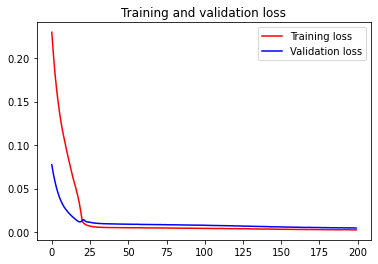

<Figure size 432x288 with 0 Axes>

In [101]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [102]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

5/5 [==============================] - 0s 3ms/step


((203, 1), (130, 1))

# Model Evaluation

In [103]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [104]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1507.459179969401
Train data MSE:  2272433.179274019
Train data MAE:  1175.885314039409
-------------------------------------------------------------------------------------
Test data RMSE:  2096.953072842981
Test data MSE:  4397212.1897056205
Test data MAE:  1837.8655048346154


In [105]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9397716457537166
Test data explained variance regression score: 0.6977110030492893


In [106]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9397710988573963
Test data R2 score: 0.6974649493579866


In [107]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0036004369917898645
Test data MGD:  0.010030330074515549
----------------------------------------------------------------------
Train data MPD:  88.8079804961626
Test data MPD:  207.85375084078964


In [108]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


In [109]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))
print(lst_output)

Output of predicted next days:  30
[[0.33564701676368713], [0.3277015686035156], [0.3208666443824768], [0.31261879205703735], [0.3053530752658844], [0.2970619201660156], [0.28963717818260193], [0.282764732837677], [0.2763231694698334], [0.2710193395614624], [0.265610933303833], [0.2595095932483673], [0.2535514533519745], [0.24722249805927277], [0.24105925858020782], [0.235271617770195], [0.23075765371322632], [0.22650544345378876], [0.22248147428035736], [0.21872572600841522], [0.21521694958209991], [0.21196164190769196], [0.2088935226202011], [0.2060161679983139], [0.20331910252571106], [0.2007787823677063], [0.19839343428611755], [0.19616858661174774], [0.1941034346818924], [0.19220241904258728]]


# Plotting last 15 days of dataset and next predicted 30 days

In [110]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [111]:
import plotly.graph_objects as go
import plotly.express as px

# Create data for last 15 days and next 30 predicted days
last_original_days_value = scaler.inverse_transform(closedf[-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value = [np.nan]*(len(last_days)+1) + scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

# Create plotly figure
fig = go.Figure()

# Add line plot for last 15 days
fig.add_trace(go.Scatter(x=last_days, y=last_original_days_value, mode='lines', name='Last 15 Days Close Price'))

# Add line plot for next 30 predicted days
fig.add_trace(go.Scatter(x=day_pred, y=next_predicted_days_value, mode='lines', name='Predicted Next 30 Days Close Price'))

# Set plot title and axis labels
fig.update_layout(title_text='Compare Last 15 Days vs Predicted Next 30 Days',
                  xaxis_title='Timestamp',
                  yaxis_title='Stock Price')

# Show plot
fig.show()



# Plotting entire Closing Stock Price with next 30 days period of prediction

In [112]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [113]:
from tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [114]:
# pip install pydot


[notice] A new release of pip available: 22.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [115]:
from tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [116]:
# pip install graphviz


[notice] A new release of pip available: 22.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [117]:
from tensorflow.keras.utils import plot_model
plot_model(model)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
